In [1]:
#@title Import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [20]:
#@title Load and prepare data

df = pd.read_csv('CSLearnData.csv')
m_names = pd.read_csv('models_table.csv')
df


,N,model,train_score_avg,train_score_std,test_score_avg,test_score_std,fit_time_avg,fit_time_std,model_size_KB_avg,model_size_KB_std,train_scoring_time_avg,train_scoring_time_std,test_scoring_time_avg,test_scoreing_time_std
0,2,MOP(ElasticNetCV),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,MOP(KNeighborsRegressor),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,MOP(RadiusNeighborsRegressor),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2,MOP(LinearSVR),-0.996793,0.000000e+00,-2.918493,0.000000e+00,0.001240,0.000170,0.876953,0.000000,0.000790,0.000093,0.000868,0.000181
4,2,MOP(NuSVR),0.000394,0.000000e+00,0.000515,0.000000e+00,0.001361,0.000057,1.882812,0.000000,0.000866,0.000015,0.002745,0.000139
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
275,400,MOP(GradientBoostingRegressor),0.999958,0.000000e+00,0.999850,1.516688e-09,12.159852,0.068336,264.247266,0.251341,0.115975,0.001553,0.006364,0.000349
276,400,MOP(AdaBoostRegressor),0.984380,1.081099e-06,0.984424,1.425281e-05,0.248304,0.042995,5.657227,0.000000,0.014569,0.001793,0.002127,0.000412
277,400,MOP(ExtraTreesRegressor),1.000000,0.000000e+00,0.999901,6.713349e-08,6.128441,0.029860,25951.389844,44.884487,0.689038,0.022048,0.050797,0.002729
278,400,MOP(HistGradientBoostingRegressor),0.999986,1.163826e-09,0.999924,1.410152e-06,1.625861,0.240617,699.476758,5.183328,0.704558,0.058277,0.039721,0.007576


In [29]:
m_names_renamed = m_names.rename(columns={'Model Name': 'model'})
df = df.merge(m_names_renamed[['model', 'No']], on='model', how='left')
df = df.rename(columns={'No': 'model_num'})
df

,N,model,train_score_avg,train_score_std,test_score_avg,test_score_std,fit_time_avg,fit_time_std,model_size_KB_avg,model_size_KB_std,train_scoring_time_avg,train_scoring_time_std,test_scoring_time_avg,test_scoreing_time_std,model_num
0,2,MOP(ElasticNetCV),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15
1,2,MOP(KNeighborsRegressor),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16
2,2,MOP(RadiusNeighborsRegressor),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17
3,2,MOP(LinearSVR),-0.996793,0.000000e+00,-2.918493,0.000000e+00,0.001240,0.000170,0.876953,0.000000,0.000790,0.000093,0.000868,0.000181,18
4,2,MOP(NuSVR),0.000394,0.000000e+00,0.000515,0.000000e+00,0.001361,0.000057,1.882812,0.000000,0.000866,0.000015,0.002745,0.000139,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
275,400,MOP(GradientBoostingRegressor),0.999958,0.000000e+00,0.999850,1.516688e-09,12.159852,0.068336,264.247266,0.251341,0.115975,0.001553,0.006364,0.000349,32
276,400,MOP(AdaBoostRegressor),0.984380,1.081099e-06,0.984424,1.425281e-05,0.248304,0.042995,5.657227,0.000000,0.014569,0.001793,0.002127,0.000412,33
277,400,MOP(ExtraTreesRegressor),1.000000,0.000000e+00,0.999901,6.713349e-08,6.128441,0.029860,25951.389844,44.884487,0.689038,0.022048,0.050797,0.002729,34
278,400,MOP(HistGradientBoostingRegressor),0.999986,1.163826e-09,0.999924,1.410152e-06,1.625861,0.240617,699.476758,5.183328,0.704558,0.058277,0.039721,0.007576,35


Loading data...
Grouped data head:
                model   N  train_score_avg  test_score_avg
0  MOP(ARDRegression)   2              1.0        0.495142
1  MOP(ARDRegression)   4              1.0        0.924399
2  MOP(ARDRegression)   8              1.0        0.985646
3  MOP(ARDRegression)  10              1.0        0.991571
4  MOP(ARDRegression)  50              1.0        0.999943
Mapping models to IDs...
Model to ID sample:
[('MOP(ARDRegression)', 1), ('MOP(AdaBoostRegressor)', 2), ('MOP(BaggingRegressor)', 3), ('MOP(BayesianRidge)', 4), ('MOP(DecisionTreeRegressor)', 5)]
Plotting Train Score heatmap...


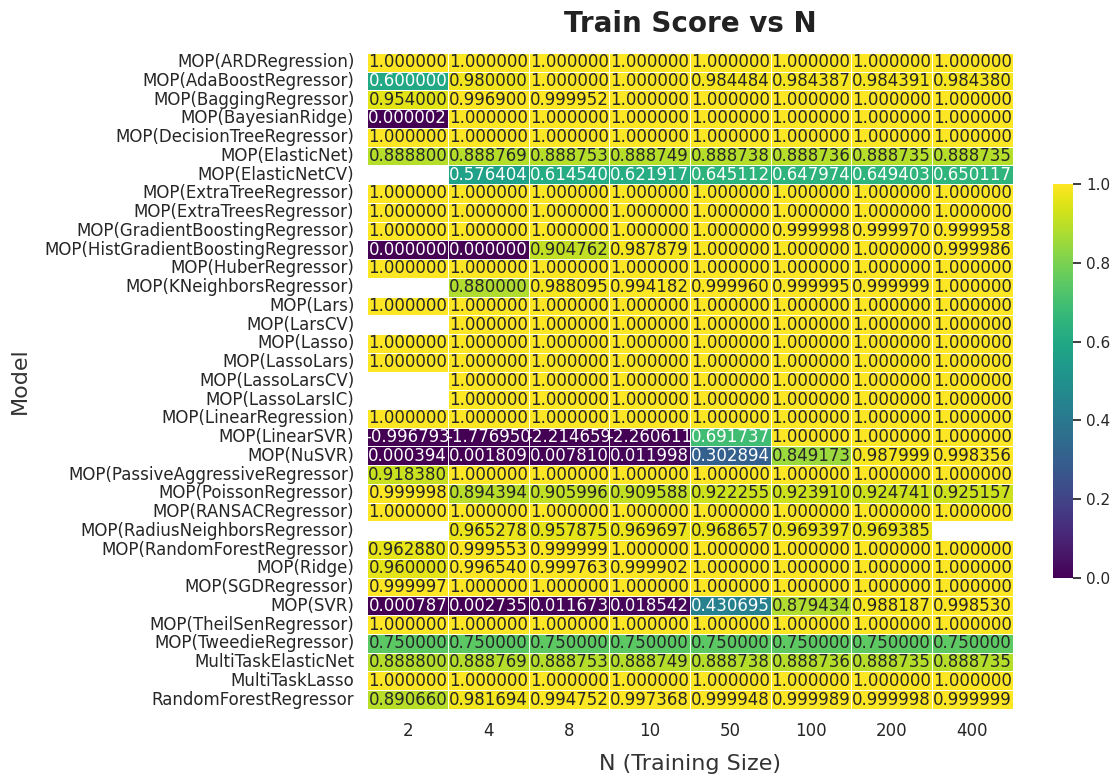

Plotting Test Score heatmap...


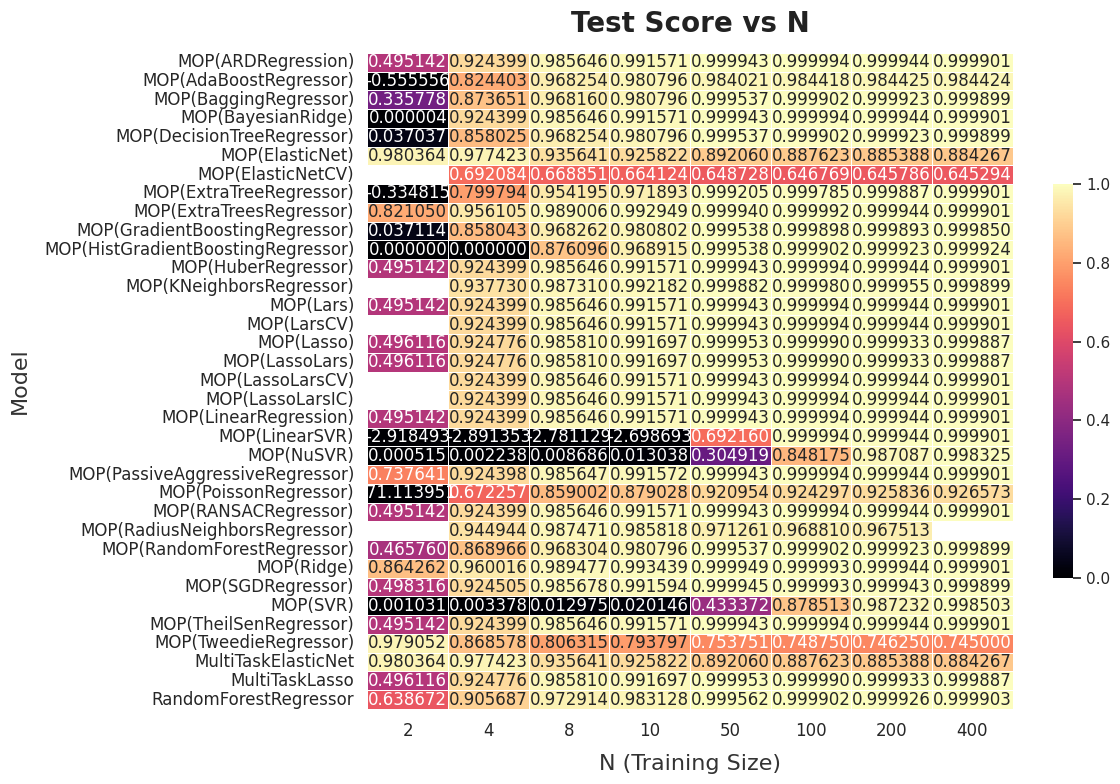

done


In [30]:
#@title Impact of N (train dataset size)

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Load data and group
print('Loading data...')
# df = pd.read_csv('nb_results_2-400_5trials_rand_final.csv')
df = df
# Group by model and N, median for train/test
grouped = df.groupby(['model', 'N'])[['train_score_avg', 'test_score_avg']].median().reset_index()
print('Grouped data head:')
print(grouped.head())

# 2. Map models to numeric IDs
print('Mapping models to IDs...')
model_mapping = {name: idx+1 for idx, name in enumerate(grouped['model'].unique())}
grouped['model_id'] = grouped['model'].map(model_mapping)
print('Model to ID sample:')
print(list(model_mapping.items())[:5])

# 3. Pivot for heatmaps
# train_pivot = grouped.pivot(index='model_id', columns='N', values='train_score_avg')
# test_pivot = grouped.pivot(index='model_id', columns='N', values='test_score_avg')

train_pivot = grouped.pivot(index='model', columns='N', values='train_score_avg')
test_pivot = grouped.pivot(index='model', columns='N', values='test_score_avg')

# 4. Plot train heatmap with vmin=0, vmax=1
sns.set_theme(style='white')
print('Plotting Train Score heatmap...')
plt.figure(figsize=(12, 8))
sns.heatmap(train_pivot, cmap='viridis', annot=True, fmt='.6f', linewidths=0.7,
            cbar_kws={'shrink':0.6}, vmin=0, vmax=1)
plt.title('Train Score vs N', pad=15, fontsize=20, color='#222222', weight='semibold')
plt.xlabel('N (Training Size)', labelpad=10, fontsize=16, color='#333333')
plt.ylabel('Model', labelpad=10, fontsize=16, color='#333333')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.savefig('train_score_heatmap.pdf')
plt.show()

# 5. Plot test heatmap with same scale
print('Plotting Test Score heatmap...')
plt.figure(figsize=(12, 8))
sns.heatmap(test_pivot, cmap='magma', annot=True, fmt='.6f', linewidths=0.7,
            cbar_kws={'shrink':0.6}, vmin=0, vmax=1)
plt.title('Test Score vs N', pad=15, fontsize=20, color='#222222', weight='semibold')
plt.xlabel('N (Training Size)', labelpad=10, fontsize=16, color='#333333')
plt.ylabel('Model', labelpad=10, fontsize=16, color='#333333')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.savefig('test_score_heatmap.pdf')
plt.show()

print('done')

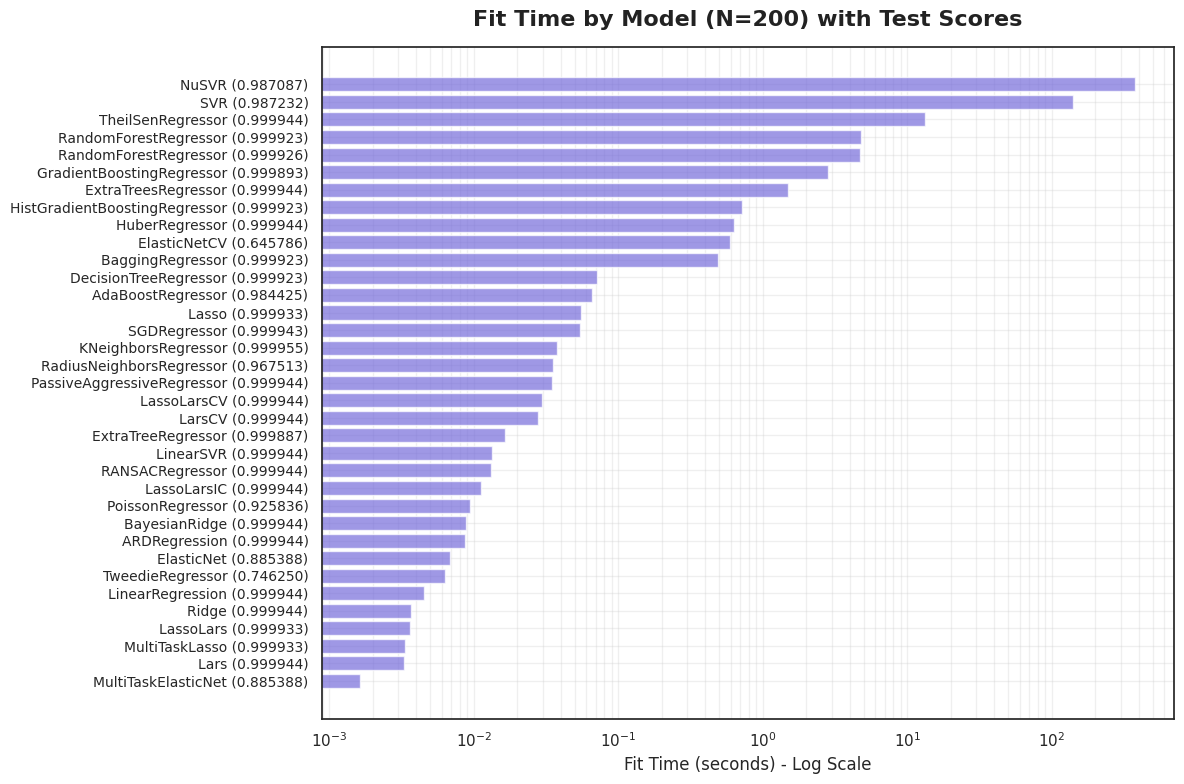

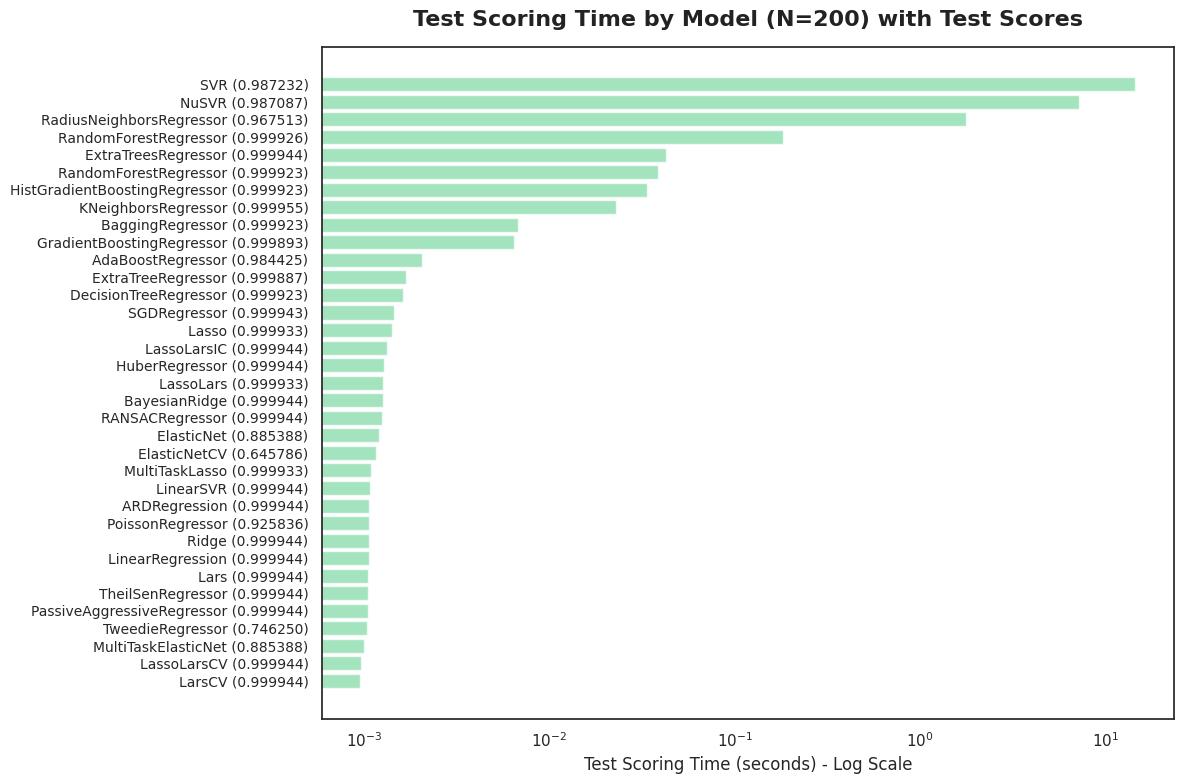

done


In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load and filter data
# df = pd.read_csv('nb_results_2-400_5trials_rand_final.csv')
df_200 = df[df['N'] == 200].copy()

# Prepare median statistics for fit time and test score for labeling
model_fit_stats = df_200.groupby('model')['fit_time_avg'].median()
model_test_score = df_200.groupby('model')['test_score_avg'].median()

# Sort the models by fit time for the fit time bar plot
sorted_models_fit = model_fit_stats.sort_values(ascending=True)

# 1. Bar Plot: Median Fit Time (Log Scale) with Test Scores in Parentheses
plt.figure(figsize=(12, 8))
bars = plt.barh(range(len(sorted_models_fit)), sorted_models_fit.values,
                color='#766CDB', alpha=0.7)
plt.xscale('log')

# Prepare y-axis labels that include test score in parentheses
y_labels_fit = []
for model in sorted_models_fit.index:
    # Remove extra text from model for neatness
    clean_model = model.replace('MOP(', '').replace(')', '')
    score = model_test_score[model]
    label = clean_model + ' (' + f'{score:.6f}' + ')'
    y_labels_fit.append(label)

plt.yticks(range(len(sorted_models_fit)), y_labels_fit, fontsize=10)
plt.xlabel('Fit Time (seconds) - Log Scale', fontsize=12)
plt.title('Fit Time by Model (N=200) with Test Scores',
          fontsize=16, pad=15, color='#222222', weight='semibold')

# Annotate bars with the exact median fit time values
# for i, bar in enumerate(bars):
#     width = bar.get_width()
#     plt.text(width, i, f' {width:.2e}', va='center', fontsize=8)

plt.grid(True, alpha=0.3, which="both")
plt.tight_layout()
plt.savefig('fit_time_barplot.pdf')
plt.show()

# Prepare median statistics for test scoring time for labeling
model_score_stats = df_200.groupby('model')['test_scoring_time_avg'].median()
# Sort the models by test scoring time for the score bar plot
sorted_models_score = model_score_stats.sort_values(ascending=True)

# 2. Bar Plot: Median Test Scoring Time (Log Scale) with Test Scores in Parentheses
plt.figure(figsize=(12, 8))
bars = plt.barh(range(len(sorted_models_score)), sorted_models_score.values,
                color='#7CD9A5', alpha=0.7)
plt.xscale('log')

# Prepare y-axis labels including test score
y_labels_score = []
for model in sorted_models_score.index:
    clean_model = model.replace('MOP(', '').replace(')', '')
    score = model_test_score[model]
    label = clean_model + ' (' + f'{score:6f}' + ')'
    y_labels_score.append(label)

plt.yticks(range(len(sorted_models_score)), y_labels_score, fontsize=10)
plt.xlabel('Test Scoring Time (seconds) - Log Scale', fontsize=12)
plt.title('Test Scoring Time by Model (N=200) with Test Scores',
          fontsize=16, pad=15, color='#222222', weight='semibold')

# Annotate bars with the exact median scoring time values
# for i, bar in enumerate(bars):
#     width = bar.get_width()
#     plt.text(width, i, f' {width:.2e}', va='center', fontsize=8)

# plt.grid(True, alpha=0.3, which="both")
plt.tight_layout()
plt.savefig('test_scoring_time_barplot.pdf')
plt.show()

print('done')

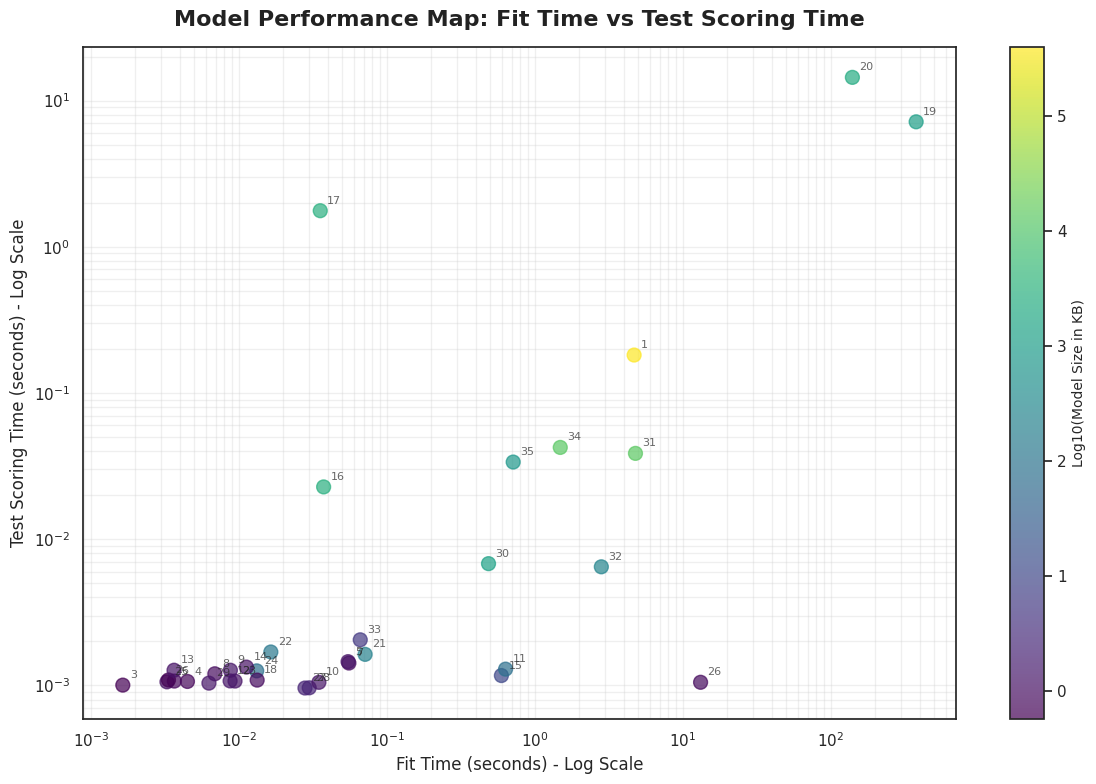

Cluster Centroids (Original Scale):
Cluster 0: Fit Time = 0.0125 sec, Test Scoring Time = 0.0014 sec
Cluster 1: Fit Time = 230.1883 sec, Test Scoring Time = 10.1588 sec
Cluster 2: Fit Time = 0.0355 sec, Test Scoring Time = 1.7652 sec
Cluster 3: Fit Time = 1.7632 sec, Test Scoring Time = 0.0096 sec
Cluster Summary:
         count  fit_median     fit_min     fit_max  score_median  score_min  \
cluster                                                                       
0           23    0.011273    0.001647    0.071445      0.001090   0.000960   
1            2  259.096383  140.166658  378.026108     10.787103   7.159252   
2            1    0.035547    0.035547    0.035547      1.765155   1.765155   
3            9    1.488134    0.487431   13.208797      0.006808   0.001051   

         score_max                                             models  
cluster                                                                
0         0.022793  [MOP(ExtraTreeRegressor), MOP(Lars), MOP(RANS

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load and filter data
# df = pd.read_csv('nb_results_2-400_5trials_rand_final.csv')
df_200 = df[df['N'] == 200].copy()

# Filter out zeros for fit, scoring time, and model size to avoid issues with logs
df_200 = df_200[(df_200['fit_time_avg'] > 0) &
                (df_200['test_scoring_time_avg'] > 0) &
                (df_200['model_size_KB_avg'] > 0)].copy()

# Create the scatter plot with colormap based on model size (log10 scale)
plt.figure(figsize=(12, 8))

# Create scatter plot with model size as a colormap (use log10 of model size for gradient)
scatter = plt.scatter(df_200['fit_time_avg'],
                      df_200['test_scoring_time_avg'],
                      c=np.log10(df_200['model_size_KB_avg']),
                      cmap='viridis',
                      s=100, alpha=0.7)

# Annotate with model numbers
for _, row in df_200.iterrows():
    plt.annotate( str(row['model_num']),
                 (row['fit_time_avg'], row['test_scoring_time_avg']),
                 xytext=(5, 5), textcoords='offset points', fontsize=8, alpha=0.7)

# Set log scale axes
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Fit Time (seconds) - Log Scale', fontsize=12)
plt.ylabel('Test Scoring Time (seconds) - Log Scale', fontsize=12)
plt.title('Model Performance Map: Fit Time vs Test Scoring Time',
          fontsize=16, pad=15, color='#222222', weight='semibold')

# Add colorbar with label
cbar = plt.colorbar(scatter)
cbar.set_label('Log10(Model Size in KB)', fontsize=10)

plt.grid(True, which='both', alpha=0.3)
plt.tight_layout()
plt.savefig('model_performance_map.pdf')
plt.show()

# Now, for clustering analysis, we cluster using log transform of fit and scoring times
X = np.log10(df_200[['fit_time_avg', 'test_scoring_time_avg']].values)

from sklearn.cluster import KMeans
k = 4
kmeans = KMeans(n_clusters=k, random_state=42)
clusters = kmeans.fit_predict(X)

df_200['cluster'] = clusters

# Print cluster centroids (original scale)
centroids_log = kmeans.cluster_centers_
centroids = 10 ** centroids_log
print('Cluster Centroids (Original Scale):')
for i, centroid in enumerate(centroids):
    print('Cluster ' + str(i) + ': Fit Time = ' + str(round(centroid[0], 4)) + ' sec, Test Scoring Time = ' + str(round(centroid[1], 4)) + ' sec')

# Compute cluster summary statistics using groupby and apply list for model names
cluster_summary = df_200.groupby('cluster').agg(
    count=('model_size_KB_avg', 'count'),
    fit_median=('fit_time_avg', 'median'),
    fit_min=('fit_time_avg', 'min'),
    fit_max=('fit_time_avg', 'max'),
    score_median=('test_scoring_time_avg', 'median'),
    score_min=('test_scoring_time_avg', 'min'),
    score_max=('test_scoring_time_avg', 'max'),
    models=('model', lambda x: list(x))
).round(6)

print('\
Cluster Summary:')
print(cluster_summary)

# Also, print correlations between fit time, test scoring time, and model size
print('\
Correlations between metrics:')
correlations = df_200[['fit_time_avg', 'test_scoring_time_avg', 'model_size_KB_avg']].corr()
print(correlations)

print('done')

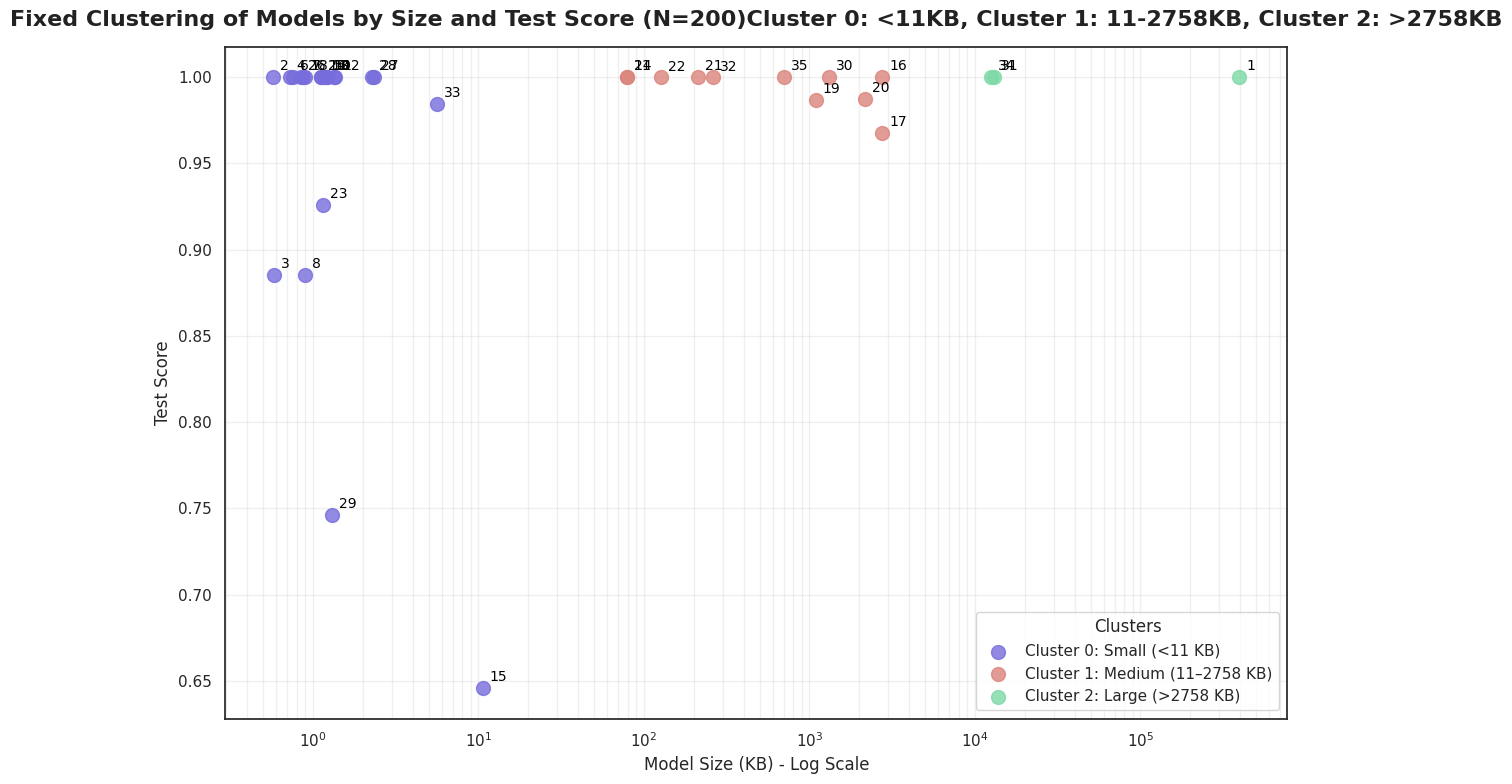

Cluster Statistics with Fixed Size Thresholds:
--------------------------------------------------
Cluster 0:
Number of models: 21
Size range: 0.58 KB to 10.60 KB
Median size: 1.15 KB
Mean test score: 0.9558
Models in this cluster:
[(2, 'MultiTaskLasso'), (3, 'MultiTaskElasticNet'), (4, 'MOP(LinearRegression)'), (5, 'MOP(SGDRegressor)'), (6, 'MOP(Ridge)'), (7, 'MOP(Lasso)'), (8, 'MOP(ElasticNet)'), (9, 'MOP(BayesianRidge)'), (10, 'MOP(PassiveAggressiveRegressor)'), (12, 'MOP(ARDRegression)'), (13, 'MOP(LassoLars)'), (14, 'MOP(LassoLarsIC)'), (15, 'MOP(ElasticNetCV)'), (18, 'MOP(LinearSVR)'), (23, 'MOP(PoissonRegressor)'), (25, 'MOP(Lars)'), (26, 'MOP(TheilSenRegressor)'), (27, 'MOP(LarsCV)'), (28, 'MOP(LassoLarsCV)'), (29, 'MOP(TweedieRegressor)'), (33, 'MOP(AdaBoostRegressor)')]
Cluster 1:
Number of models: 11
Size range: 79.03 KB to 2757.58 KB
Median size: 702.61 KB
Mean test score: 0.9947
Models in this cluster:
[(11, 'MOP(HuberRegressor)'), (16, 'MOP(KNeighborsRegressor)'), (17, 'MO

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load and filter data
# df = pd.read_csv('nb_results_2-400_5trials_rand_final.csv')
df_size = df[df['N'] == 200].copy()
df_size = df_size[(df_size['model_size_KB_avg'] > 0) & (df_size['test_score_avg'] > 0)].copy()

# Define fixed clustering based on size thresholds
def assign_size_cluster(size):
    if size < 11:  # Small models under 11 KB
        return 0
    elif size < 2758:  # Medium models (79-2,758 KB)
        return 1
    else:  # Large models (12.5-395 MB)
        return 2

# Assign clusters based on fixed thresholds
df_size['size_cluster'] = df_size['model_size_KB_avg'].apply(assign_size_cluster)

# Define distinct colors for each cluster
colors = ['#766CDB', '#DA847C', '#7CD9A5']

plt.figure(figsize=(12, 8))

# Plot clusters
for cluster in range(3):
    mask = df_size['size_cluster'] == cluster
    plt.scatter(df_size[mask]['model_size_KB_avg'],
                df_size[mask]['test_score_avg'],
                c=[colors[cluster]],
                label=f'Cluster {cluster}',
                s=100,
                alpha=0.8)

# Annotate points with model numbers
for idx, row in df_size.iterrows():
    plt.annotate(str(row['model_num']),
                 (row['model_size_KB_avg'], row['test_score_avg']),
                 color='black',
                 fontsize=10,
                  xytext=(5, 5), textcoords='offset points')

plt.xscale('log')
plt.xlabel('Model Size (KB) - Log Scale', fontsize=12)
plt.ylabel('Test Score', fontsize=12)
plt.title('Fixed Clustering of Models by Size and Test Score (N=200)\
Cluster 0: <11KB, Cluster 1: 11-2758KB, Cluster 2: >2758KB',
          fontsize=16, pad=15, color='#222222', weight='semibold')
# dash =
# Add legend with size ranges
legend_labels = ['Cluster 0: Small (<11 KB)',
                 'Cluster 1: Medium (11\U000020132758 KB)',
                 'Cluster 2: Large (>2758 KB)']
plt.legend(legend_labels, title='Clusters', bbox_to_anchor=(.7, .17), loc='upper left')

plt.grid(True, which='both', alpha=0.3)
plt.tight_layout()
plt.savefig('fixed_size_clustering.pdf')
plt.show()

# Print summary statistics for each cluster
print("\
Cluster Statistics with Fixed Size Thresholds:")
print("-" * 50)
for cluster in range(3):
    cluster_data = df_size[df_size['size_cluster'] == cluster]
    print(f"\
Cluster {cluster}:")
    print(f"Number of models: {len(cluster_data)}")
    print(f"Size range: {cluster_data['model_size_KB_avg'].min():.2f} KB to {cluster_data['model_size_KB_avg'].max():.2f} KB")
    print(f"Median size: {cluster_data['model_size_KB_avg'].median():.2f} KB")
    print(f"Mean test score: {cluster_data['test_score_avg'].mean():.4f}")
    print("\
Models in this cluster:")
    print(sorted(list(zip(cluster_data['model_num'], cluster_data['model']))))

print('done')